### ARX MIMO Example
Case: 3 outputs x 4 inputs

Author: Giuseppe Armenise, revised by RBdC

In [20]:
import numpy as np
from sklearn.pipeline import Pipeline

from sippy_unipi.datasets import load_sample_mimo
from sippy_unipi.io import ARX, FIR
from sippy_unipi.plot import plot_comparison
from sippy_unipi.preprocessing import StandardScaler

# Enable automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
seed = 0
np.random.seed(0)

In [22]:
na = [3, 1, 2]
nb = [[2, 1, 3, 2], [3, 2, 1, 1], [1, 2, 1, 2]]
th = [[1, 2, 2, 1], [1, 2, 0, 0], [0, 1, 0, 2]]

n_samples = 401
ts = 1.0
time, Ysim, Usim, g_sys, Yerr, Uerr, h_sys, Ytot, Utot = load_sample_mimo(
    n_samples, ts, seed=seed
)

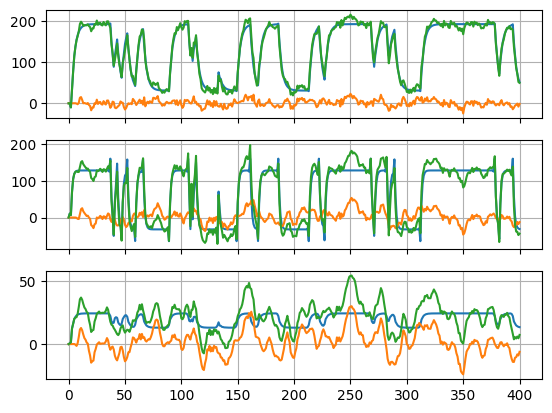

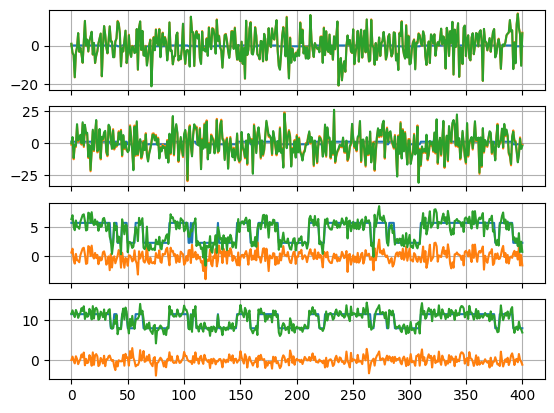

In [23]:
fig = plot_comparison(
    time,
    [Ysim, Yerr, Ytot],
    ylabels=[f"$y_{i}$" for i in range(3)],
    title="Output (validation data)",
)

fig = plot_comparison(
    time,
    [Usim, Uerr, Utot],
    [r"$u_\mathrm{GBN, " + str(i) + "}$" for i in range(Usim.shape[1])],
    title="Input (Switch probability=0.03) (validation data)",
)

### Identification Parameters

In [24]:
models = [
    Pipeline(
        [
            ("scaler", StandardScaler(with_mean=False)),
            ("model", ARX(na, nb, th, method="lls")),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler(with_mean=False)),
            ("model", FIR(nb, th, method="lls")),
        ]
    ),
]

Ys_pred = [Ytot]
for model in models:
    model.fit(Utot, Ytot)
    Ys_pred.append(model.predict(Utot))

### Plot Results

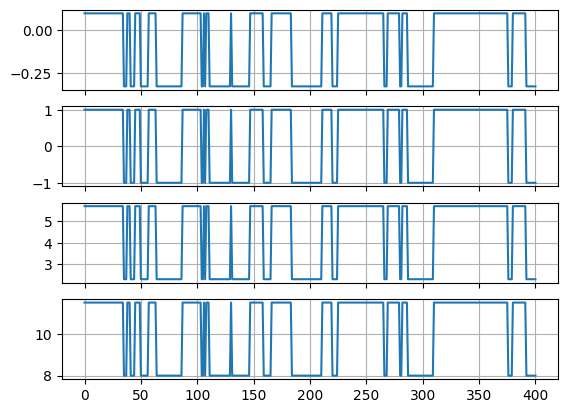

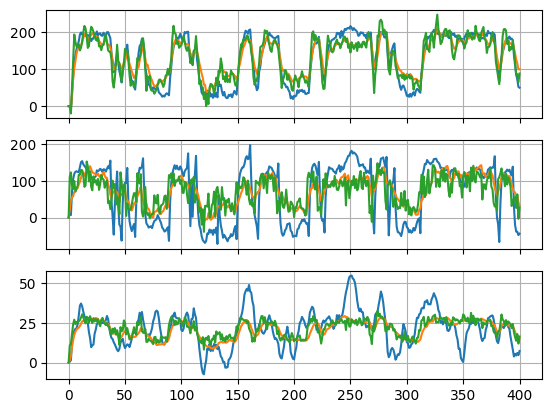

In [25]:
fig = plot_comparison(
    time,
    Usim,
    [r"$u_\mathrm{GBN, " + str(i) + "}$" for i in range(Usim.shape[1])],
    title="Input (Switch probability=0.03) (validation data)",
)

fig = plot_comparison(
    time,
    Ys_pred,
    ylabels=[f"$y_{i}$" for i in range(3)],
    legend=["System", "ARX", "FIR"],
    title="Output (validation data)",
)